In [1]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
from Transformer import SpeechCommandTransformer, train_transformer, calculate_class_weights, plot_confusion_matrix, plot_accuracy_loss, set_seed
import torch
from torch.optim import AdamW
import torch.nn as nn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
torch.cuda.empty_cache()
set_seed(213)

In [2]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="modified")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="modified")
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class_weights = calculate_class_weights(train_dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

In [5]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=[1,2], cnn_type=3).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

Epoch [1/20], Train Loss: 1.6405, Train Accuracy: 24.48, Test Accuracy: 37.85%


Epoch [2/20], Train Loss: 0.9633, Train Accuracy: 43.60, Test Accuracy: 63.63%


Epoch [3/20], Train Loss: 0.7190, Train Accuracy: 55.33, Test Accuracy: 63.83%


Epoch [4/20], Train Loss: 0.5905, Train Accuracy: 62.76, Test Accuracy: 59.46%


Epoch [5/20], Train Loss: 0.5062, Train Accuracy: 68.33, Test Accuracy: 72.40%


Epoch [6/20], Train Loss: 0.4481, Train Accuracy: 71.87, Test Accuracy: 74.99%


Epoch [7/20], Train Loss: 0.4008, Train Accuracy: 74.68, Test Accuracy: 73.94%


Epoch [8/20], Train Loss: 0.3652, Train Accuracy: 76.85, Test Accuracy: 77.06%


Epoch [9/20], Train Loss: 0.3337, Train Accuracy: 78.44, Test Accuracy: 75.28%


Epoch [10/20], Train Loss: 0.3112, Train Accuracy: 79.88, Test Accuracy: 79.42%


Epoch [11/20], Train Loss: 0.2097, Train Accuracy: 85.68, Test Accuracy: 85.11%


Epoch [12/20], Train Loss: 0.1887, Train Accuracy: 86.78, Test Accuracy: 83.91%


Epoch [13/20], Train Loss: 0.1822, Train Accuracy: 87.00, Test Accuracy: 85.04%


Epoch [14/20], Train Loss: 0.1757, Train Accuracy: 87.45, Test Accuracy: 85.22%


Epoch [15/20], Train Loss: 0.1691, Train Accuracy: 87.92, Test Accuracy: 84.72%


Epoch [16/20], Train Loss: 0.1654, Train Accuracy: 88.04, Test Accuracy: 85.22%


Epoch [17/20], Train Loss: 0.1564, Train Accuracy: 88.61, Test Accuracy: 85.38%


Epoch [18/20], Train Loss: 0.1581, Train Accuracy: 88.56, Test Accuracy: 85.93%


Epoch [19/20], Train Loss: 0.1525, Train Accuracy: 88.85, Test Accuracy: 86.91%


Epoch [20/20], Train Loss: 0.1476, Train Accuracy: 88.98, Test Accuracy: 86.67%
Best Test Accuracy: 86.67%, Best Train Accuracy: 88.98%


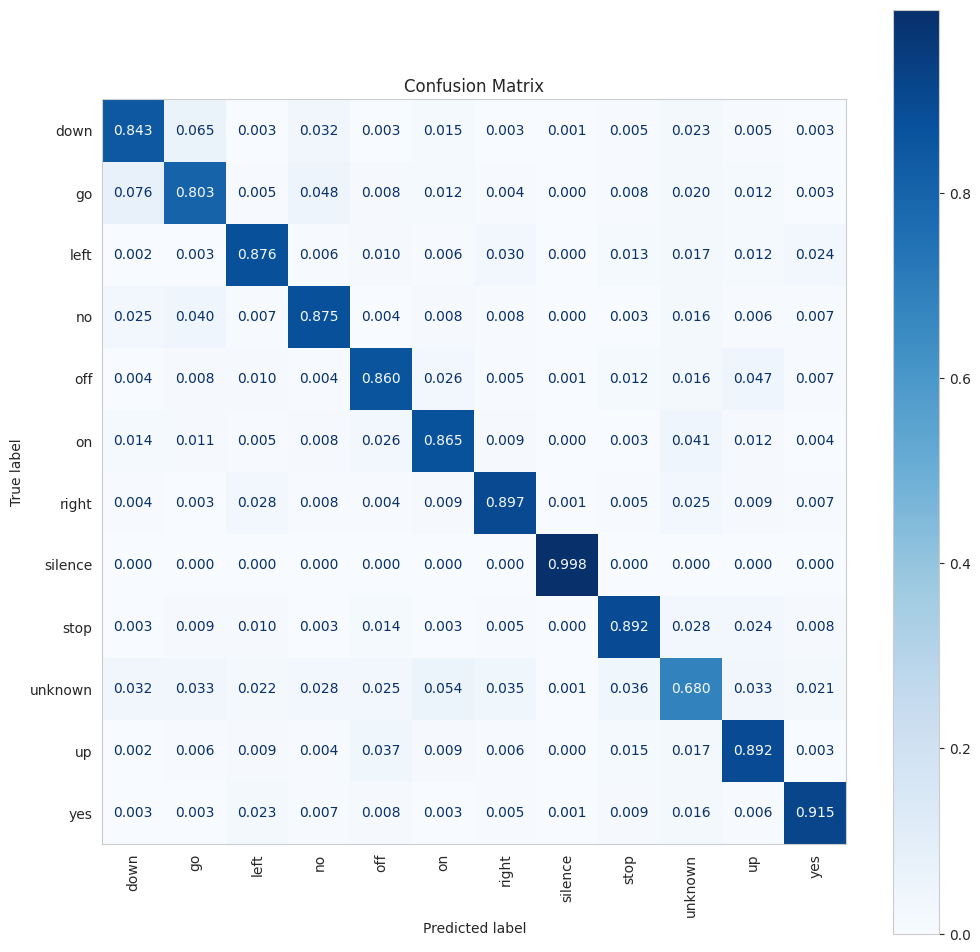

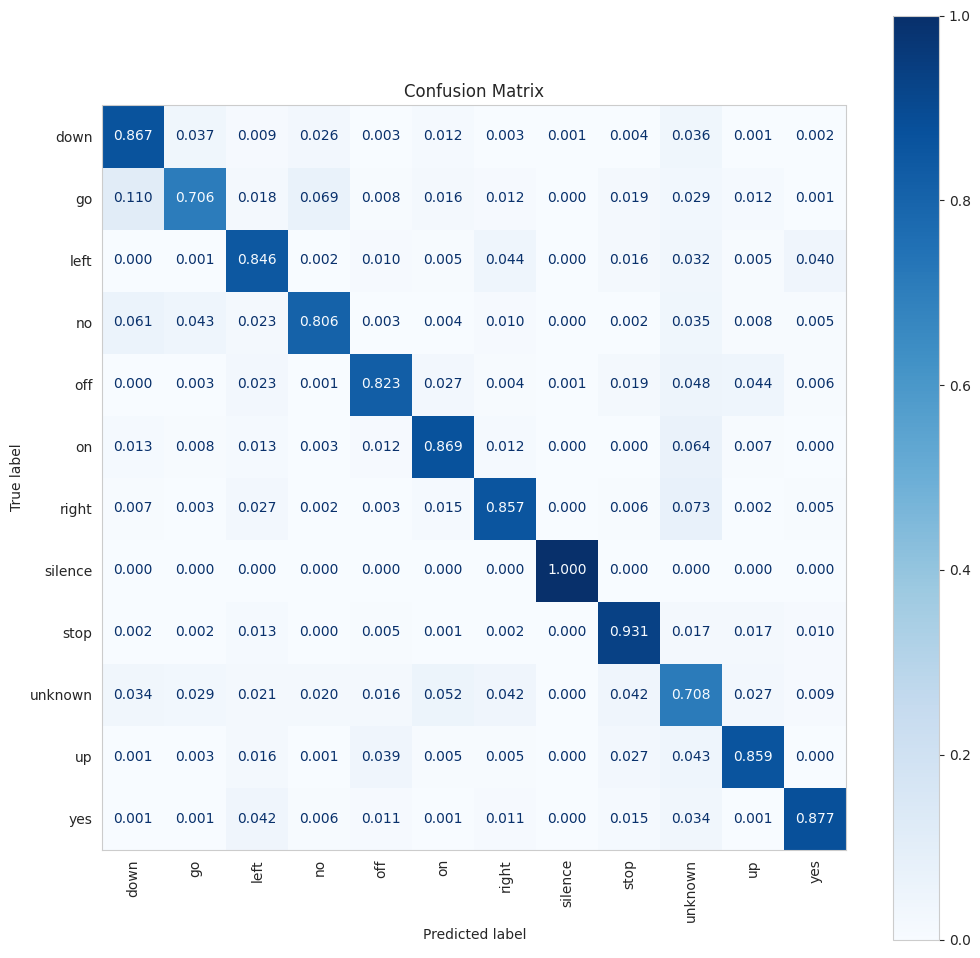

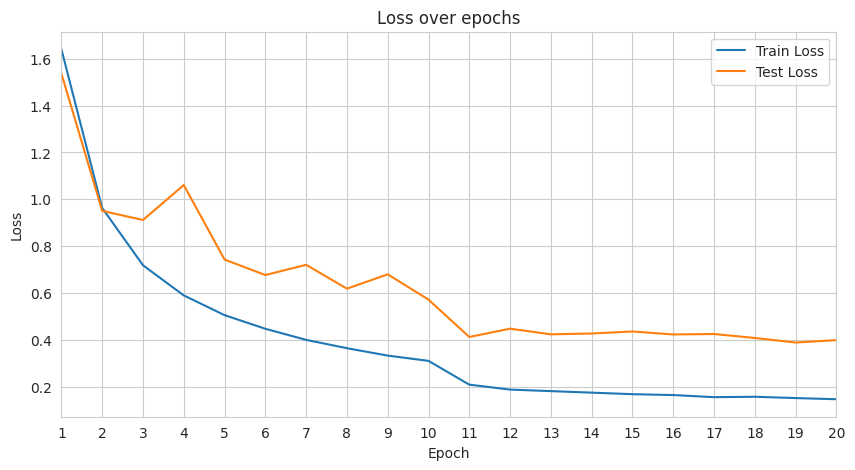

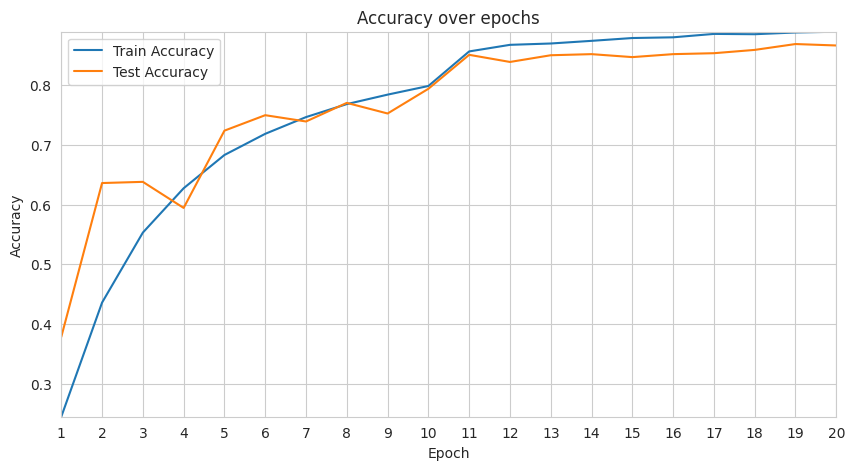

In [6]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)